# Piano
> "Piano - Music theory"
- toc: true
- branch: master
- categories: [posts]
- hide: false
- search_exclude: true

In [427]:
# hide_input

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, Image, Markdown
from typing import List

In [624]:
# hide
class Note:
    def __init__(self, frequency=440, sampling=44100, duration=1):
        self.f = frequency
        self.rate = sampling
        self.duration = duration
        self.t = np.linspace(0, self.duration, int(self.duration*self.rate), False)
        self.wave = self._create_wave(self.f, self.t)
    
    def _create_wave(self, f: float, t: np.array) -> np.array:
        return np.sin(2*np.pi*f*t)
    
    def set_duration(self, new_duration: float):
        self.duration = new_duration
        self.t = np.linspace(0, self.duration, int(self.duration*self.rate), False)
        self.wave = self._create_wave(self.f, self.t)
        return self
    
    def play(self):
        return Audio(self.wave, rate=self.rate, autoplay=True)
    
    def __mul__(self, factor: float):
        return Note(self.f*factor, self.rate, self.duration)

    def __add__(self, note: Note):
        self.wave += note.wave
        return self
    
    def __repr__(self):
        return str(self.f)

class Seq():
    def __init__(self, notes: List[Note]):
        self.total_duration = np.sum([n.duration for n in notes])
        self.rate = notes[0].rate
        durations = [n.duration for n in notes]
        for note in notes:
            note.set_duration(self.total_duration)
            
        n_final = notes[0]
        t=notes[0].t
        n_final.wave = notes[0].wave*(t<=durations[0])
        tot_dur = durations[0]
        for i, note in enumerate(notes[1:]):
            tot_dur += durations[i+1]
            n_final.wave += note.wave*(t<=tot_dur)*(t>(tot_dur-durations[i]))
        
        self.seq = n_final
        
    def play(self):
        return Audio(self.seq.wave, rate = self.rate, autoplay=False)

    
class Scale():
    step = 2**(1/12)
    fifth = 2**(7/12)
    _major=[step**2,step**2,step,step**2,step**2,step**2,step]
    freq={'C4':261.63, 
          'G4':261.63*(2**(7/12))}
    
    def __init__(self, key=None, frequency=None, scale_type=None, note_duration=1):
        self.key = key
        self.scale_type = scale_type
        if frequency:
            self.frequency = frequency
        else:
            self.frequency = self.freq.get(key)

        self.note_duration = note_duration
        self.tonic = Note(self.frequency, duration=self.note_duration)
        self.notes = [self.tonic]
        for n, interval in enumerate(self._major):
            self.notes.append(self.notes[n]*interval)
        self.scale = Seq(self.notes)
            
    def play(self):
        print(f"Playing {self.key} {self.scale_type} scale")
        return self.scale.play()

In [615]:
# hide

# frequency = 440  # Our played note will be 440 Hz
# fs = 44100  # 44100 samples per second
# seconds = 3  # Note duration of 3 seconds

# # Generate array with seconds*sample_rate steps, ranging between 0 and seconds
# t = np.linspace(0, seconds, seconds*fs, False)

# # Generate a 440 Hz sine wave
# A4 = 0.5*np.sin(frequency * t * 2 * np.pi)
# E5 = 0.5*np.sin(3/2*frequency * t * 2 * np.pi)
# A42 = 0.5*np.sin(2*frequency * t * 2 * np.pi)
# A43 = 0.5*np.sin(3*frequency * t * 2 * np.pi)

# Audio(A4*(t<=1)+A42*(t<=2)*(t>=1).any()+A43*(t>=2), rate=fs)

### The Piano

The piano contains 88 keys, grouped in 7 octaves each with 12 notes making up the westren chromatic scale <br> $C, C\#, D, D\#, E, E\#, F, F\#, G, G\#, A, A\#, B$ , and additional 4 notes $A, A\#, B$ at the left end and $C$ at the right end.

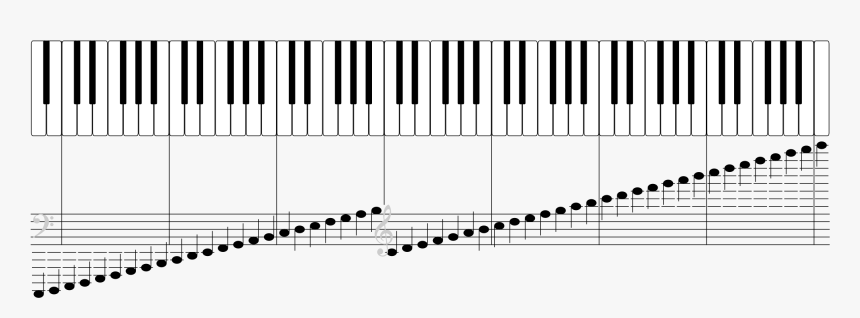

In [234]:
# hide_input
display(Image('https://www.pngitem.com/pimgs/m/367-3674138_piano-notes-png-all-piano-keys-and-notes.png'))

Each note has a cooresponding string (or multiple strings) 
and a hammer that hits those strings when the note is played.
Because the string is fixed at both ends, there are fundamental frequencies (pitches) (also called harmonics or overtunes) in which the string "prefers" to vibrate in.
These fundamental frequencies/harmonics depend on its length $L$, tension $T$ and mass ($m$) density $\lambda = m/L$ as,
$f = \frac{\sqrt{T/\lambda}}{2L}$.
The shape of a grand piano is exactly due to the varying lengths and mass densities of the string needed to obtain the range of frequencies, with the lowest bass notes being thicker and longer.

The study of harmonics and vibrating strings goes back to Pythagoras, who found that certain rational ratios of string lengths make pleasent (harmonious) sound when played together, and the intervals he defined are the basis for all of Western music.

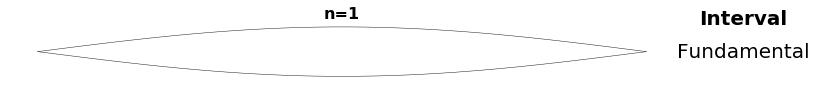

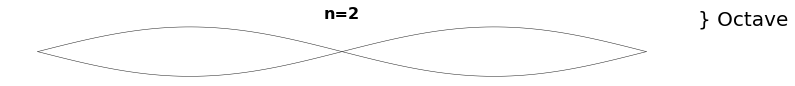

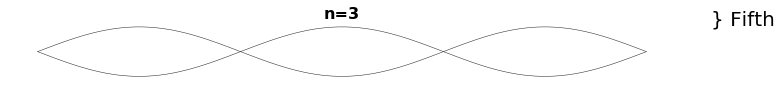

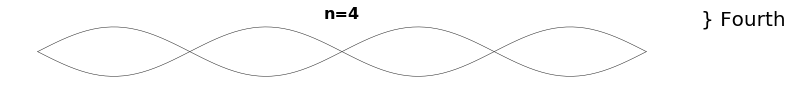

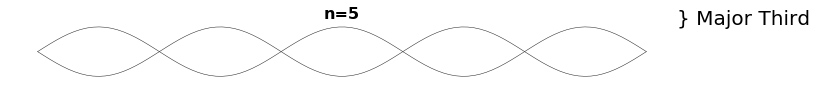

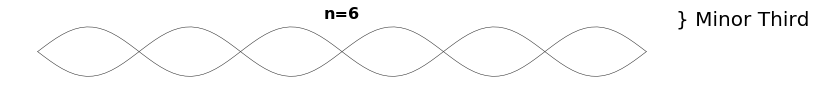

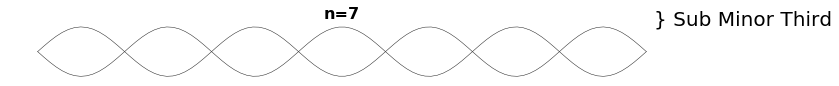

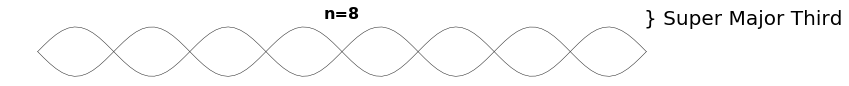

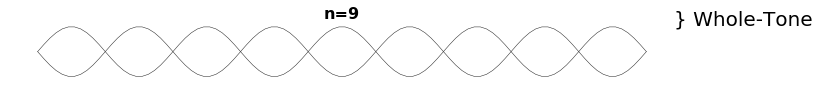

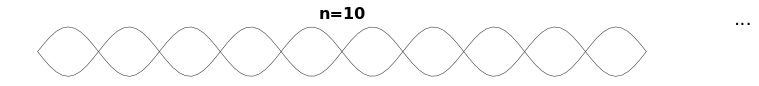

In [235]:
# hide_input

t = np.linspace(0, 2*np.pi, 100);
mapping = {1: "Fundamental", 
           2: "} Octave",
           3: "} Fifth",
           4: "} Fourth",
           5: "} Major Third",
           6: "} Minor Third",
           7: "} Sub Minor Third",
           8: "} Super Major Third",
           9: "} Whole-Tone",
           10: "..."}

for n in range(1,11):
    fig, ax=plt.subplots(figsize=(12,1))
    ax.plot(t, np.sin(t*n/2), color='#222222', linewidth='0.5');
    ax.plot(t, -np.sin(t*n/2), color='#222222', linewidth='0.5');
    if n==1:
        ax.annotate(s="Interval", xy=(2*np.pi+1,1), ha="center",
                    xycoords=ax.get_xaxis_transform(), fontsize=20, fontweight="bold")
        ax.annotate(s=mapping.get(n), xy=(2*np.pi+1,0.4), ha="center",
                    xycoords=ax.get_xaxis_transform(), fontsize=20)
    else:
        ax.annotate(s=mapping.get(n), xy=(2*np.pi+1,1), ha="center",
                    xycoords=ax.get_xaxis_transform(), fontsize=20)

    ax.set_title(f"n={n}", fontsize=16, fontweight="bold")
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.axis('off');

On a piano staff the harmonic series is shown below

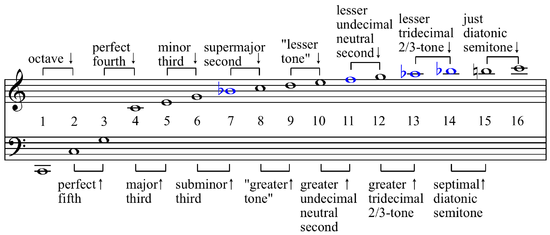

source: Wikipedia

In [236]:
# hide_input

display(Image("https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Harmonic_series_intervals.png/550px-Harmonic_series_intervals.png"))
Markdown("source: Wikipedia")

Harmonics have an important role in tuning the notes of the piano, in particular, a note an octave apart
should have double the frequency. Notes an octave apart sound "the same" and indeed are given the same note name (with a subscript), this is to do with how the ear percieves pitch, which is logarithmic in the frequency and not linearly, and therefore in the harmonic series which are separated by a constant (the fundamental frequency) they sound as if they get closer and closer (on a logarithmic scale).

In the piano since we have 12 keys in an octave, if we were to use the semitone (or just diatomic semitone above) for tuning
the keys relative to eachother we would reach the same note after 12 intervals, however
as the ratio of frequencies between two keys, semi-tone apart is $16/15$ we would get a frequency of $\left(\frac{16}{15}\right)^{12} \approx 2.169.. $, which is significantly different to $2$, required by the octave series. Similarly, using a wholetone would give $\left(\frac{9}{8}\right)^6=2.027..$.

As a reusult, to keep the octave interval exact, the well-tempred tuning was invented in which
a semitone interval is a multiple of $2^{1/12}$, such that 12 semitones give $(2^{1/12})^{12}=2$.
The downside is that all the other intervals become inexact, i.e. too sharp (higher frequency) or too flat (lower frequency). For example, a perfect fifth is $(2)^{7/12}=1.498..$ which is a bit flatter than $3/2$.

### Circle of fifths

The notes related by rational ratios $p/q$ with small $q, p$ tend to sound more harmonious 
than ones with larger $q, p$. The first such interval is the perfect fifth which 
is $3/2$ or $1.498..$ in an equal tempered tuning, an example is the notes $C$ and $G$.

The perfect fifth interval has an important role in music theory in construct known as 
the "circle of fifths".

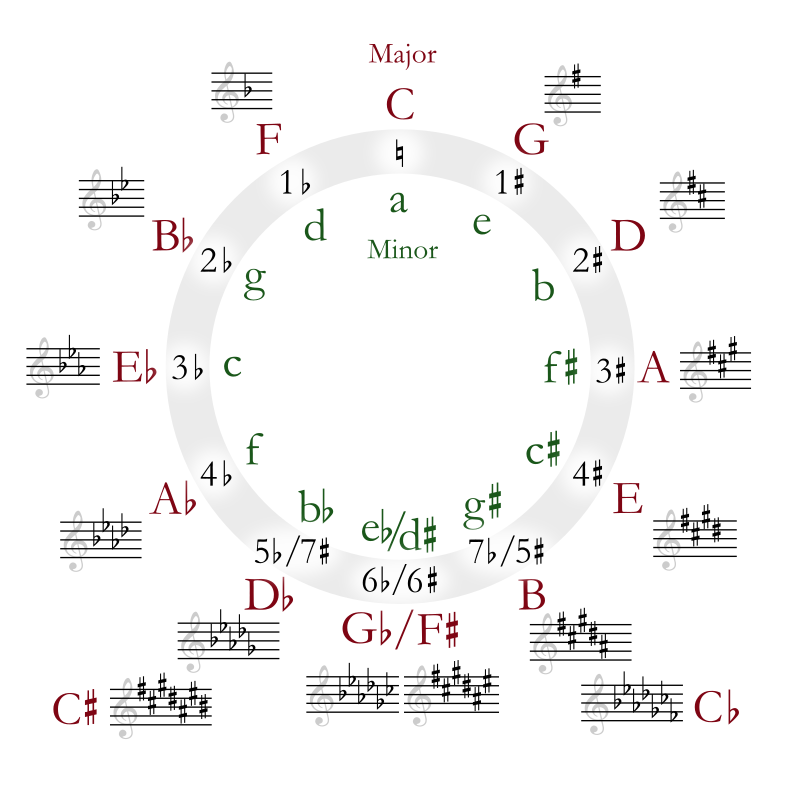

source: Wikipedia

In [277]:
# hide_input
display(Image("https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Circle_of_fifths_deluxe_4.svg/800px-Circle_of_fifths_deluxe_4.svg.png"))
Markdown("source: Wikipedia")

The notes on the outer circles going clockwise are related by a perfect fifth interval (7 semitones), 
with the key signature given as well. Each subsequent key has an additional sharp note in the major scale.
Similarly, the inner circle lists the relative minor keys, which have the same key signature as their 
corresponding major.
In the counter-clockwise direction, there are Fourth intervals (5 semitones), with a corresponding flat in the key signature.

### Major Scales

The major scale is made out of 7 notes which follow a sequence of intervals from the first (tonic) 
note or the key.

$W - W - S - W - S - W - W - W - S$

#### C Major

In [622]:
Scale('C4', scale_type='major').play()

Playing C4 major scale
